<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/Malicious_Address_Prediction/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**column 'label' has values 1 - malicious , 0 - non-malicious**

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/project_data/malicious_prediction_data.csv')

In [74]:
print(df.shape)
print(df.dtypes)
df.head(5)

(534, 17)
address                      object
comment                      object
no_of_out_transactions      float64
tot_ether_sent              float64
no_of_in_transactions         int64
tot_ether_recieved          float64
monthly_out_txn             float64
monthly_in_txn              float64
active_months                 int64
eth_balance                 float64
time_b/w_out_txn            float64
time_b/w_in_txn             float64
tot_token_value_recieved    float64
tot_token_value_sent        float64
monthly_ether_sent          float64
monthly_ether_recieved      float64
label                         int64
dtype: object


,address,comment,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,monthly_out_txn,monthly_in_txn,active_months,eth_balance,time_b/w_out_txn,time_b/w_in_txn,tot_token_value_recieved,tot_token_value_sent,monthly_ether_sent,monthly_ether_recieved,label
0,0x983bda798a24720bb4fe3dba287ec352e7b440fc,Fake BITCAR platform token,0.0,0.000000,7,0.000000,0.000000,3.5,2,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
1,0x45029af827c652f47b1f678456b2cd009647c8ad,Fake BITCAR platform token,0.0,0.000000,5,0.000000,0.000000,2.5,2,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
2,0xcc02b920ae227f1be7d01fc241c27e5f74d40436,Fake copy of ROCK2 token,0.0,0.000000,3,0.000000,0.000000,3.0,1,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
3,0x181c71726f12ce2514e8b93019eb22645a79f966,Fake Whalesburg ICO support,47.0,32.078751,28,32.101368,9.400000,7.0,5,0.000000,229893.021277,3.781516e+05,0.0,0.0,6.415750,6.420274,1
4,0x2056d2e97cc9ad78cf527b382495a8b9704ce011,Fake Whalesburg ICO support,11.0,1.076784,6,1.082241,3.666667,3.0,3,0.000143,813860.636364,1.322250e+06,0.0,0.0,0.358928,0.360747,1


In [75]:
df.mean()

no_of_out_transactions      1.498427e+02
tot_ether_sent              1.859411e+03
no_of_in_transactions       6.531648e+01
tot_ether_recieved          1.873335e+03
monthly_out_txn             1.309968e+01
monthly_in_txn              1.601115e+01
active_months               5.425094e+00
eth_balance                 1.991260e+19
time_b/w_out_txn            8.846449e+05
time_b/w_in_txn             8.689263e+05
tot_token_value_recieved    1.740037e+57
tot_token_value_sent        2.170932e+17
monthly_ether_sent          1.525014e+02
monthly_ether_recieved      2.269928e+02
label                       5.000000e-01
dtype: float64

In [76]:
df.std()

no_of_out_transactions      2.486349e+03
tot_ether_sent              3.425423e+04
no_of_in_transactions       6.382657e+02
tot_ether_recieved          3.416540e+04
monthly_out_txn             1.004221e+02
monthly_in_txn              9.232221e+01
active_months               5.410799e+00
eth_balance                 2.978806e+20
time_b/w_out_txn            1.638365e+06
time_b/w_in_txn             1.970095e+06
tot_token_value_recieved    2.800965e+58
tot_token_value_sent        5.016685e+18
monthly_ether_sent          1.510494e+03
monthly_ether_recieved      1.698302e+03
label                       5.004688e-01
dtype: float64

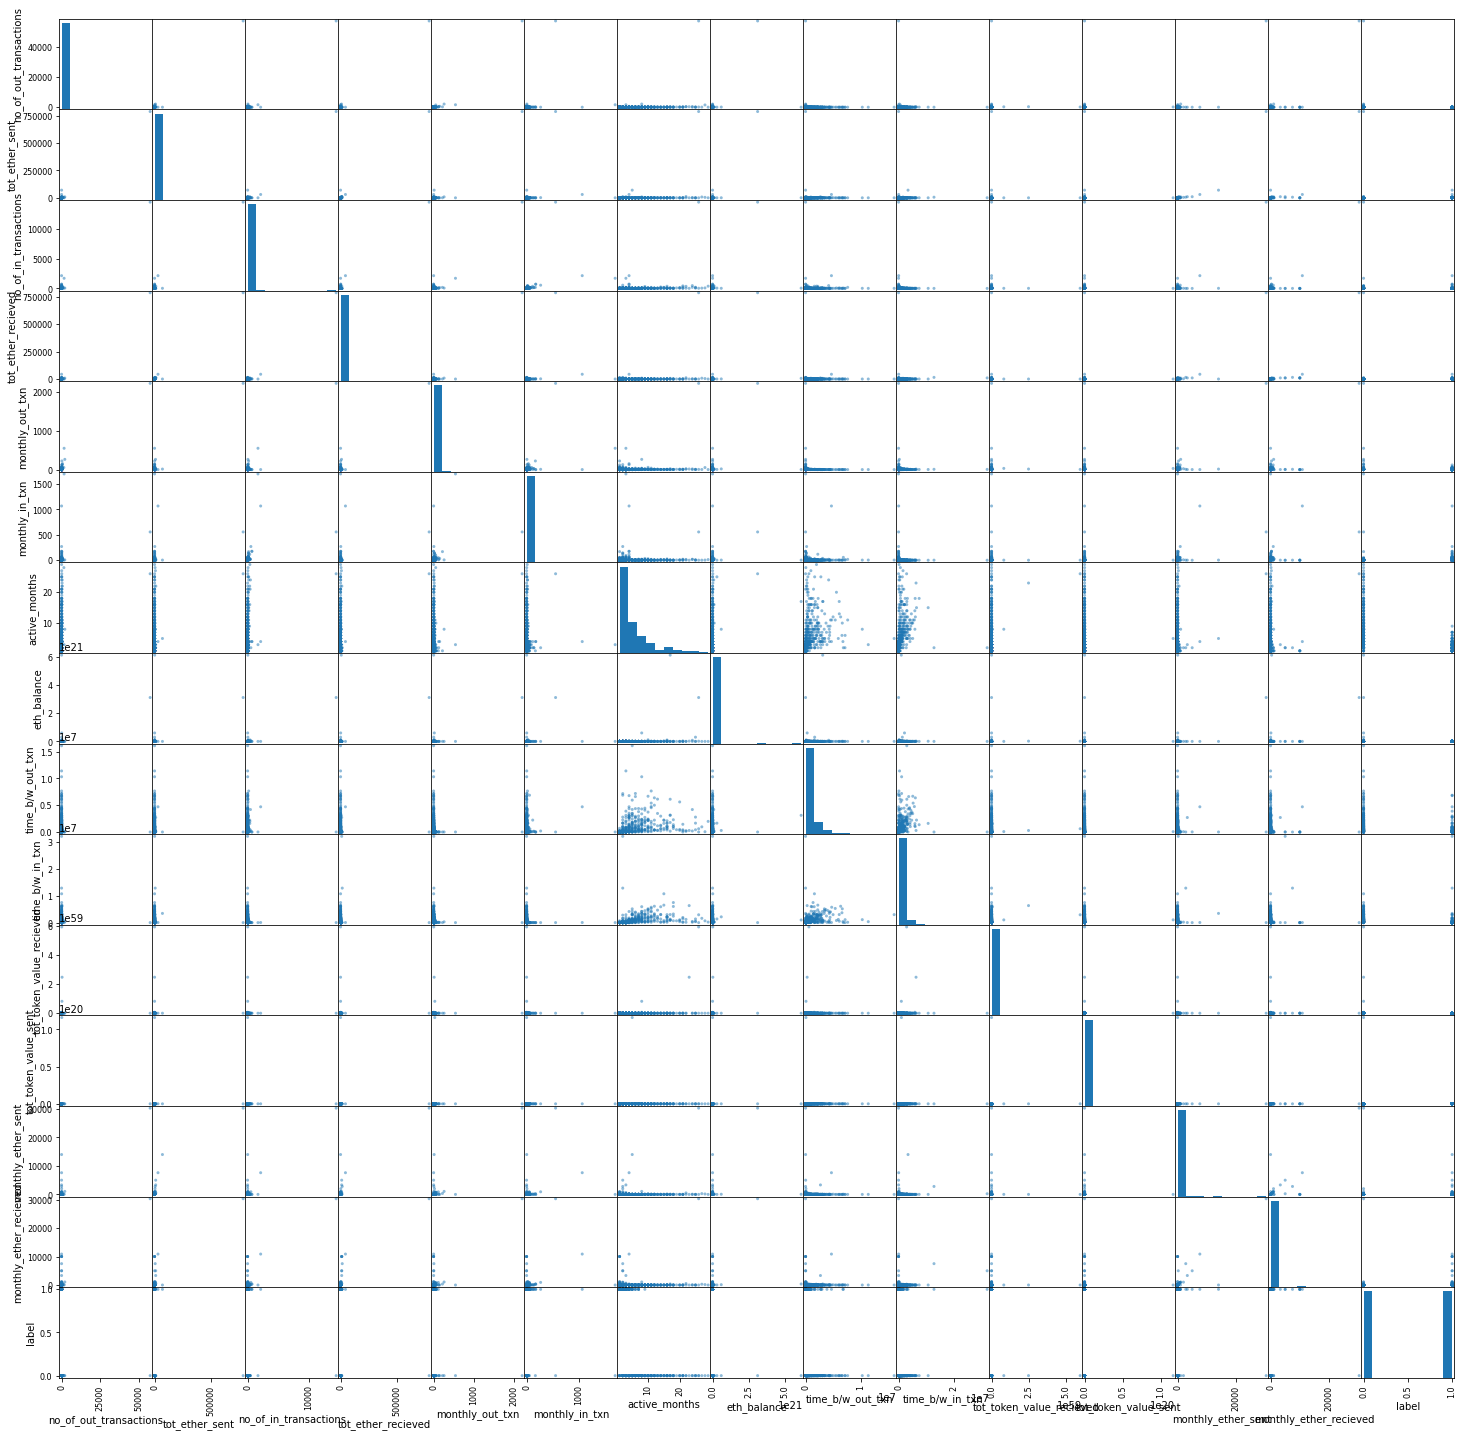

In [77]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

In [78]:
df.columns

Index(['address', 'comment', 'no_of_out_transactions', 'tot_ether_sent',
       'no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
       'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn',
       'time_b/w_in_txn', 'tot_token_value_recieved', 'tot_token_value_sent',
       'monthly_ether_sent', 'monthly_ether_recieved', 'label'],
      dtype='object')

In [0]:
b = df.loc[:,'no_of_out_transactions':].copy()

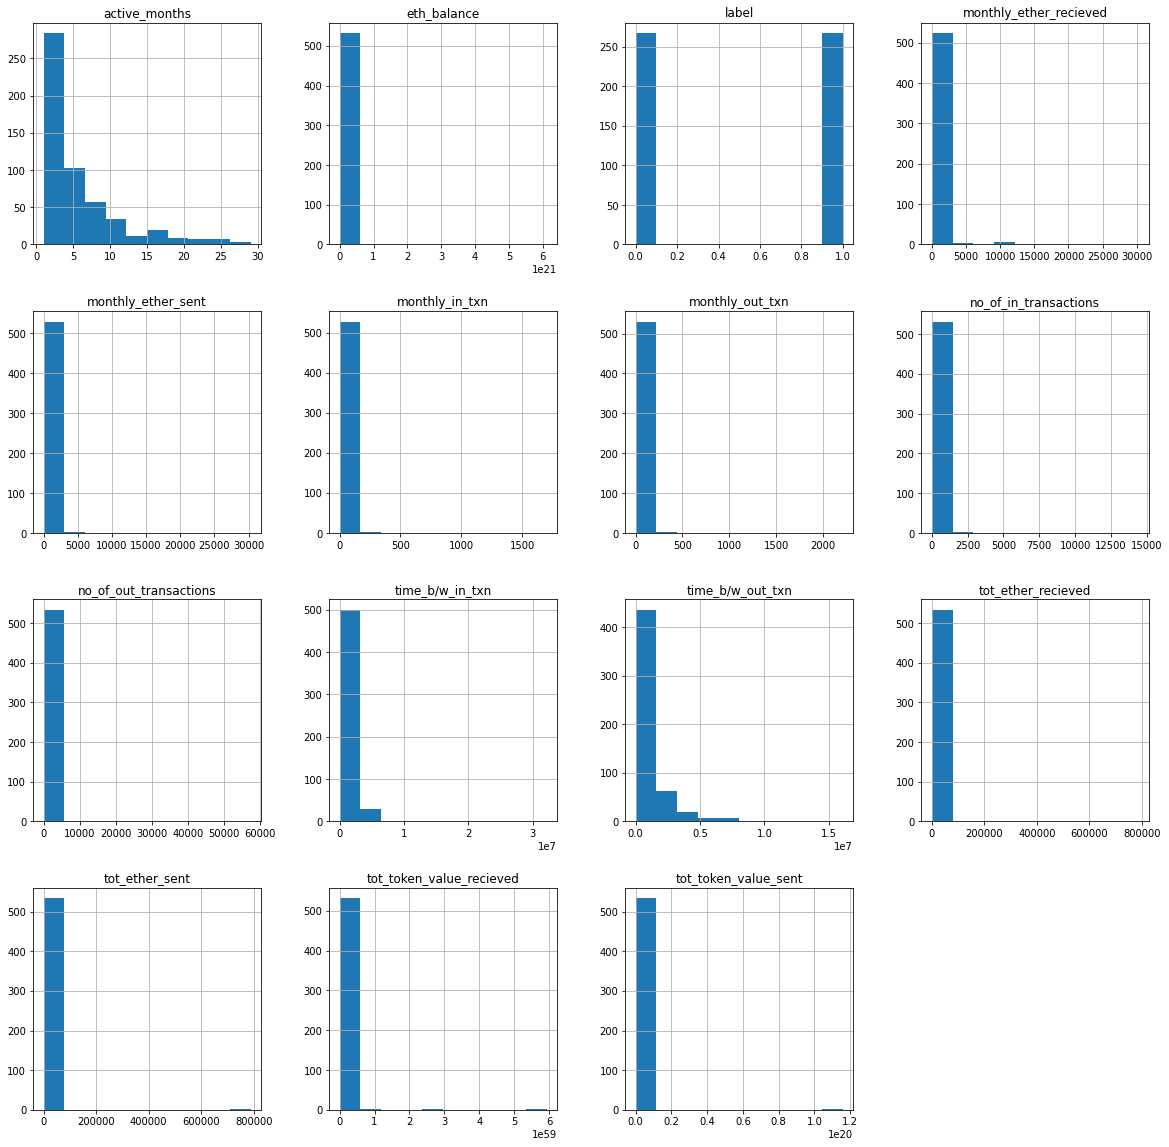

In [80]:
p = b.hist(figsize = (20,20))

In [0]:
# normalization

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(b.drop(["label"],axis = 1),),
        columns=['no_of_out_transactions', 'tot_ether_sent',
       'no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
       'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn',
       'time_b/w_in_txn', 'tot_token_value_recieved', 'tot_token_value_sent',
       'monthly_ether_sent', 'monthly_ether_recieved'])

In [0]:
y = b['label']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,shuffle=True, stratify=y)

In [0]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [85]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [86]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 88.76404494382022 % and k = [4, 6, 7]


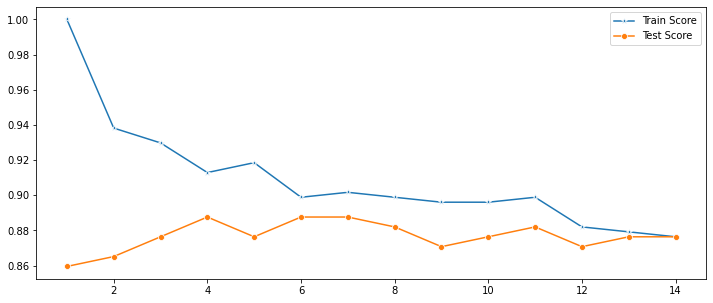

In [87]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [0]:
def apply_knn(k):
  #Setup a knn classifier with k neighbors
  knn = KNeighborsClassifier(k)

  knn.fit(X_train,y_train)
  print(knn.score(X_test,y_test))

  y_pred = knn.predict(X_test)
  from sklearn import metrics
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  #import classification_report
  from sklearn.metrics import classification_report
  print(classification_report(y_test,y_pred))
  return knn,y_pred

0.8876404494382022
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        89
           1       0.96      0.81      0.88        89

    accuracy                           0.89       178
   macro avg       0.90      0.89      0.89       178
weighted avg       0.90      0.89      0.89       178



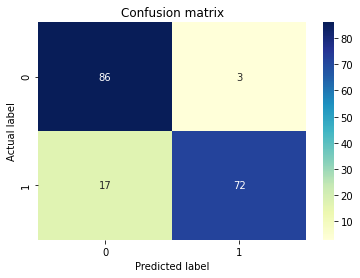

In [89]:
knn_4 = apply_knn(4)

In [0]:
# #import confusion_matrix
# from sklearn.metrics import confusion_matrix
# #let us get the predictions using the classifier we had fit above
# y_pred = knn.predict(X_test)
# confusion_matrix(y_test,y_pred)
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

0.8876404494382022
              precision    recall  f1-score   support

           0       0.82      0.99      0.90        89
           1       0.99      0.79      0.87        89

    accuracy                           0.89       178
   macro avg       0.90      0.89      0.89       178
weighted avg       0.90      0.89      0.89       178



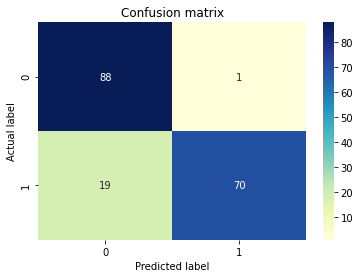

In [91]:
knn_6 = apply_knn(6)

0.8876404494382022
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        89
           1       0.93      0.84      0.88        89

    accuracy                           0.89       178
   macro avg       0.89      0.89      0.89       178
weighted avg       0.89      0.89      0.89       178



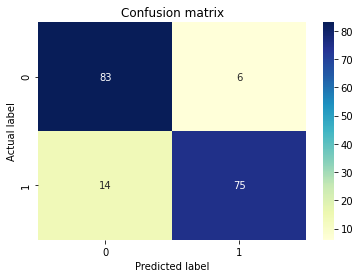

In [92]:
knn_7,y_pred = apply_knn(7)

In [93]:
b.iloc[1]['label']

1.0

In [94]:
knn_7.predict([b.iloc[1][:'monthly_ether_recieved']])

array([0])

In [95]:
X_test.head(5)

,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,monthly_out_txn,monthly_in_txn,active_months,eth_balance,time_b/w_out_txn,time_b/w_in_txn,tot_token_value_recieved,tot_token_value_sent,monthly_ether_sent,monthly_ether_recieved
377,-0.056297,-0.053504,-0.085180,-0.054051,-0.119494,-0.161664,1.031296,-0.066910,2.751855,2.244724,-0.062181,-0.043315,-0.099346,-0.132263
252,-0.043012,-0.032646,-0.097726,-0.033134,0.298026,-0.141064,-0.818593,-0.066910,-0.532068,-0.416040,-0.062181,-0.043315,0.390767,0.303750
253,-0.033350,-0.054325,-0.085180,-0.054869,-0.035167,-0.143775,0.291340,-0.066910,0.048430,0.152839,-0.062181,-0.043315,-0.101027,-0.133746
338,-0.042207,-0.054147,-0.080475,-0.054694,-0.074502,-0.135643,0.846307,-0.066759,-0.045071,0.564975,-0.062181,-0.043315,-0.100632,-0.133404
325,-0.012416,-0.053649,-0.072634,-0.054350,0.017695,-0.139257,0.476329,-0.066885,-0.427600,0.066459,-0.062181,-0.043315,-0.099116,-0.132445


In [0]:
x_set = X_test.reset_index()
y_set = y_test.reset_index()
x_set = x_set.drop('index',axis=1)
y_set = y_set.drop('index',axis=1)

In [97]:
a = []
a.append(x_set.iloc[0].values)
a

[array([-0.05629694, -0.05350428, -0.08517991, -0.05405121, -0.11949365,
        -0.16166354,  1.03129574, -0.06691027,  2.75185466,  2.24472355,
        -0.06218102, -0.04331481, -0.09934629, -0.13226329])]

In [98]:
y_set

,label
0,0
1,1
2,1
3,0
4,0
...,...
173,0
174,0
175,1
176,0


In [99]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0])

In [0]:
malicious_x = []
not_malicious_x = [] 
malicious_y = []
not_malicious_y = [] 
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    malicious_x.append(x_set.iloc[i].values)
    malicious_y.append(y_pred[i])

  else:
    not_malicious_x.append(x_set.iloc[i].values)
    not_malicious_y.append(y_pred[i])

In [105]:
print(len(malicious_x))
print(len(not_malicious_x)) 
print(len(malicious_y))
print(len(not_malicious_y)) 

81
97
81
97


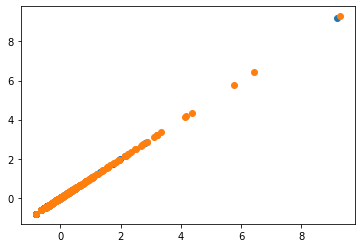

In [112]:
plt.scatter(malicious_x,malicious_x)
plt.scatter(not_malicious_x,not_malicious_x)